In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

df = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", attrs={"class": "wikitable collapsible collapsed"})[3]

In [3]:
# Вивести перші рядки таблиці за допомогою методу head

df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
# Визначте кількість рядків та стовпців у датафреймі

df.shape

(28, 9)

In [6]:
# Замініть у таблиці значення "—" на значення NaN

df = df.replace( to_replace = '—' , value = np.NaN)

In [ ]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [7]:
# Замініть типи нечислових колонок на числові.

df = df.apply(pd.to_numeric, errors='ignore')

In [8]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

missing = df.isnull().sum()
total = len(df)
percentage = (missing / total) * 100
print(percentage)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [9]:
# Видаліть з таблиці дані по всій країні

df = df.drop([27])

In [10]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

df = df.fillna(df.mean())

<ipython-input-10-6f3f91ca5479>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

average = df['2019'].mean()

regions = df[df['2019'] > average]['Регіон']

print(regions)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [ ]:
# У якому регіоні була найвища народжуваність у 2014 році?

res = df[df['2014'] == df['2014'].max()]['Регіон'].iloc[0]
print(res)

Рівненська


Text(0, 0.5, 'Тисяч дітей')

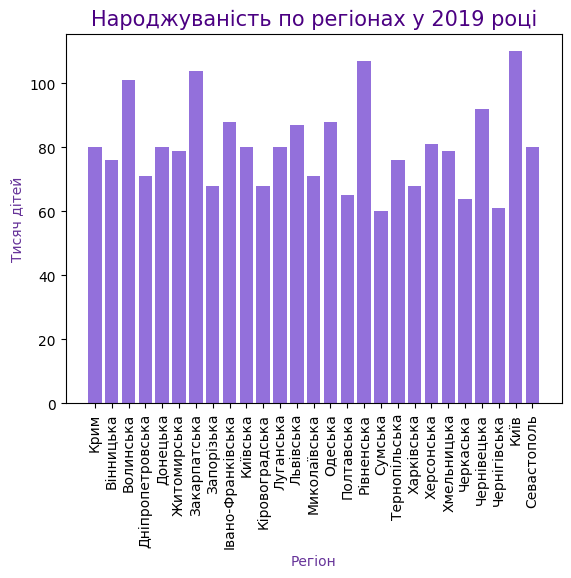

In [9]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

plt.bar(df['Регіон'], df['2019'], color = ['mediumpurple'])
plt.xticks(rotation=90)
plt.title('Народжуваність по регіонах у 2019 році', fontsize=15, color='indigo',)
plt.xlabel('Регіон', fontsize='medium', color='rebeccapurple')
plt.ylabel('Тисяч дітей', fontsize='medium', color='rebeccapurple')

In [10]:
print(df['2019'])

0      80.173913
1      76.000000
2     101.000000
3      71.000000
4      80.173913
5      79.000000
6     104.000000
7      68.000000
8      88.000000
9      80.000000
10     68.000000
11     80.173913
12     87.000000
13     71.000000
14     88.000000
15     65.000000
16    107.000000
17     60.000000
18     76.000000
19     68.000000
20     81.000000
21     79.000000
22     64.000000
23     92.000000
24     61.000000
25    110.000000
26     80.173913
Name: 2019, dtype: float64


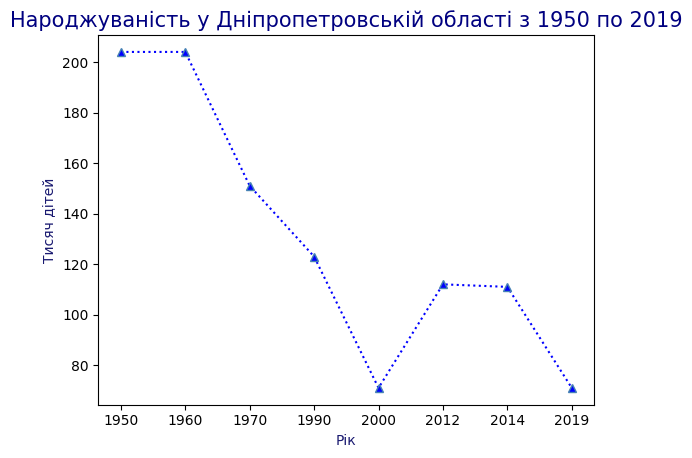

In [32]:
# графік 1

new_data = df[df['Регіон']== 'Дніпропетровська']

years = new_data.columns[1:]
birth_rate = new_data.iloc[0, 1:]
plt.plot(years, birth_rate, color = '#0000FF', linestyle=':',marker="^", markeredgecolor='#4682B4')
plt.title('Народжуваність у Дніпропетровській області з 1950 по 2019', fontsize=15, color='#000080',)
plt.xlabel('Рік', fontsize='medium', color='#191970')
plt.ylabel('Тисяч дітей', fontsize='medium', color='#191970')
plt.show()

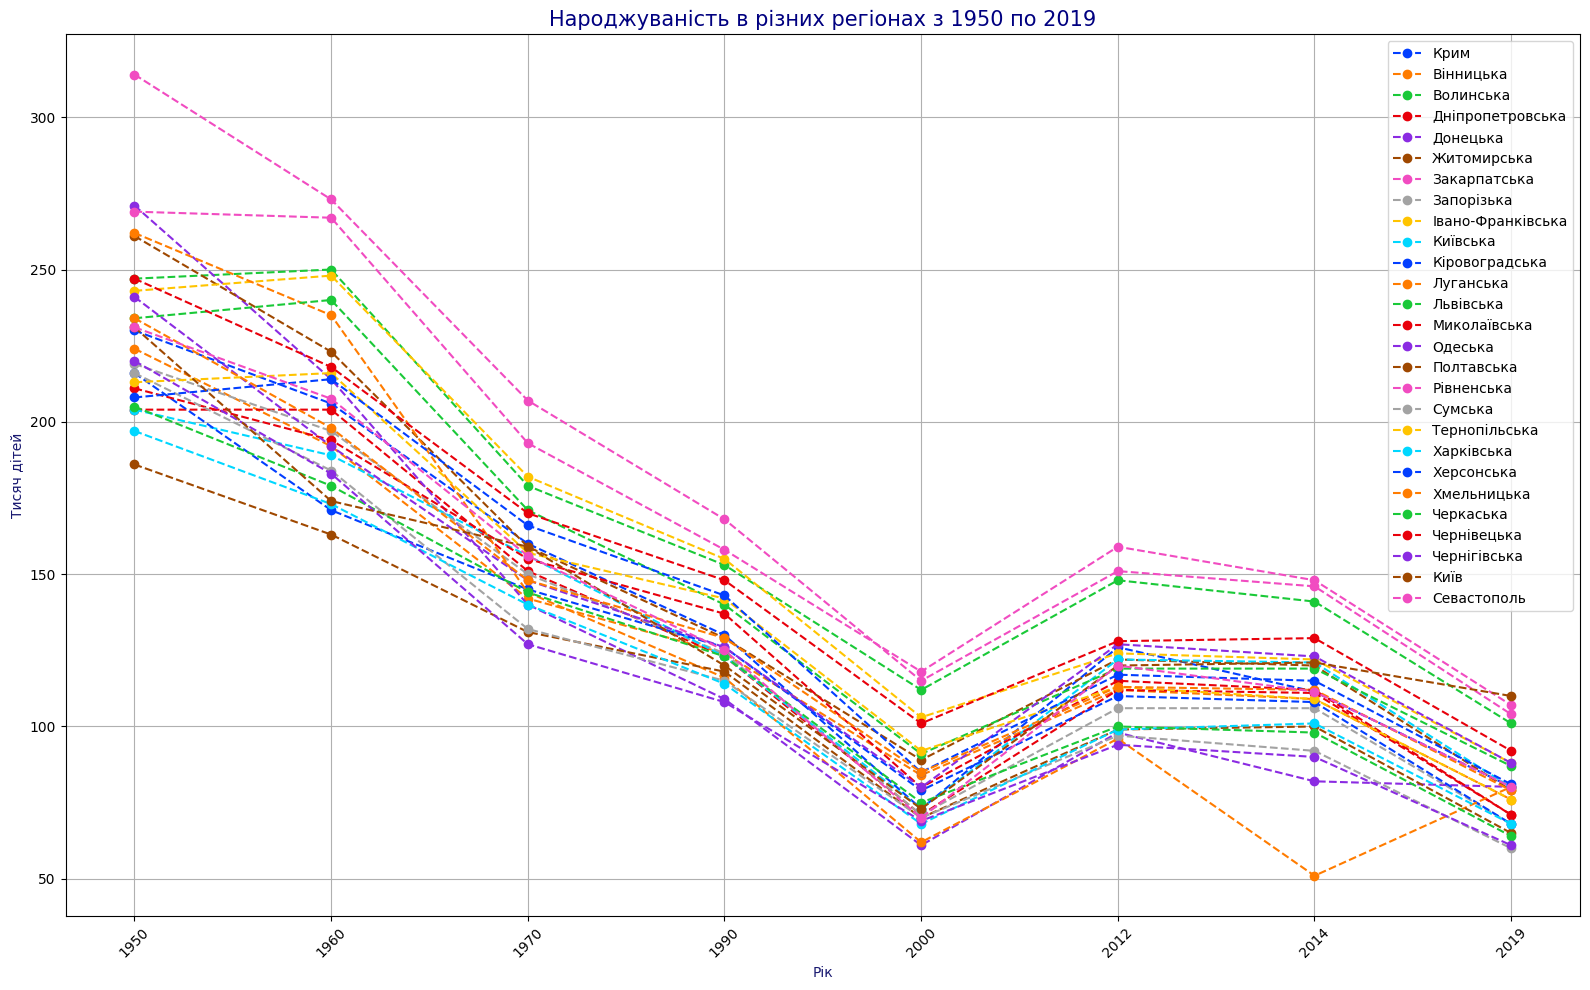

In [40]:
# графік 2

plt.figure(figsize=(16, 10))
for index, row in df.iterrows():
    region_name = row['Регіон']
    years = df.columns[1:]
    birth_rate = row[1:]

    plt.plot(years, birth_rate, linestyle='dashed',  marker='o', label=region_name)

plt.title('Народжуваність в різних регіонах з 1950 по 2019', fontsize=15, color='#000080')
plt.xlabel('Рік', fontsize='medium', color='#191970')
plt.ylabel('Тисяч дітей', fontsize='medium', color='#191970')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



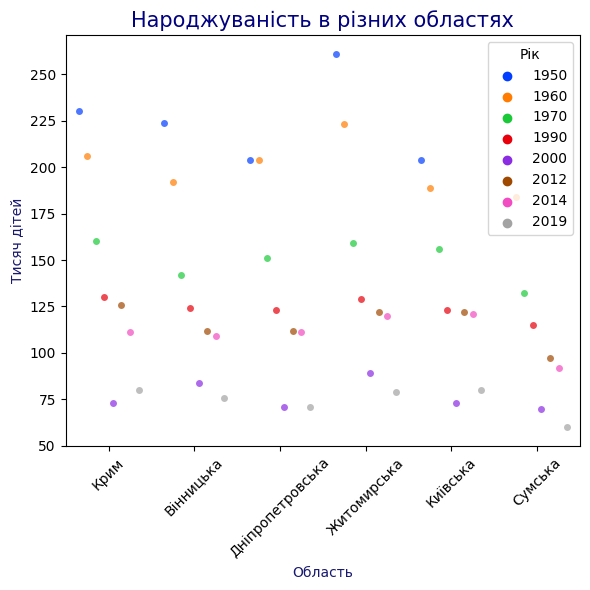

In [31]:
# графік 3

regions = ['Крим', 'Вінницька', 'Дніпропетровська', 'Сумська', 'Київська', 'Житомирська']

selected_data = df[df['Регіон'].isin(regions)]
melted_data = selected_data.melt(id_vars='Регіон', var_name='Year', value_name='Birth_Rate')

sns.set_palette("bright")
plt.figure(figsize=(6, 6))
sns.stripplot(x='Регіон', y='Birth_Rate', hue='Year', data=melted_data, dodge=True, jitter=True, marker='o', alpha=0.7)
plt.title('Народжуваність в різних областях', fontsize=15, color='#000080')
plt.xlabel('Область', fontsize='medium', color='#191970')
plt.ylabel('Тисяч дітей', fontsize='medium', color='#191970')
plt.legend(title='Рік', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()